In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
computers = pd.read_csv('/home/abin/Desktop/computers.csv')
computers.head()

,Units,Minutes,min_model0,min_model1,min_model2
0,1,23,97.21,22,24
1,2,29,97.21,34,42
2,3,49,97.21,46,60
3,4,64,97.21,58,78
4,4,74,97.21,58,78


In [30]:
mean_value = computers.Minutes.mean()
mean_value


97.21428571428571

Text(0, 0.5, 'Minutes')

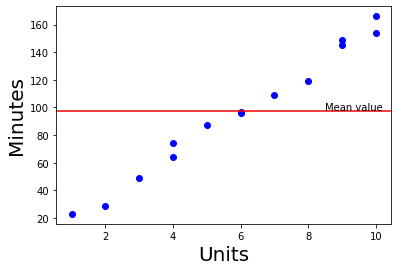

In [31]:
plt.axhline(y = mean_value, color = 'red')
plt.annotate('Mean value', xy = (8.5,mean_value+0.5))
plt.scatter(x = 'Units', y = 'Minutes', data = computers, color= 'blue')
plt.xlabel('Units', fontsize = 20)
plt.ylabel('Minutes', fontsize = 20)

In [32]:
computers.head()

,Units,Minutes,min_model0,min_model1,min_model2
0,1,23,97.21,22,24
1,2,29,97.21,34,42
2,3,49,97.21,46,60
3,4,64,97.21,58,78
4,4,74,97.21,58,78


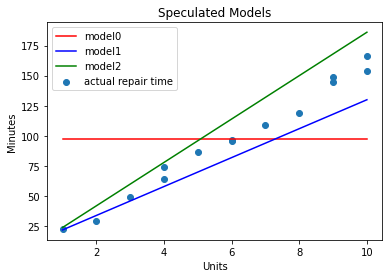

In [33]:
fig,ax = plt.subplots()

ax.scatter(x="Units",y="Minutes",data=computers,label='actual repair time')

ax.plot(computers['Units'], computers['min_model0'], color = 'red', label = 'model0')
ax.plot(computers['Units'], computers['min_model1'], color = 'blue', label = 'model1')
ax.plot(computers['Units'], computers['min_model2'], color = 'green', label = 'model2')

ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Speculated Models")
ax.legend()

In [34]:
model0_obs = pd.DataFrame({'Units': computers['Units'],
                          'Actual_Time': computers['Minutes'],
                          'Predicted_Time': computers['min_model0'],
                          'Error': (computers['min_model0'] - computers['Minutes'])})

model0_obs

,Units,Actual_Time,Predicted_Time,Error
0,1,23,97.21,74.21
1,2,29,97.21,68.21
2,3,49,97.21,48.21
3,4,64,97.21,33.21
4,4,74,97.21,23.21
5,5,87,97.21,10.21
6,6,96,97.21,1.21
7,6,97,97.21,0.21
8,7,109,97.21,-11.79
9,8,119,97.21,-21.79


### Analyzing Model0

In [37]:
#sum of errors
print("Sum of errors in Model0: ", sum(model0_obs['Error']))

Sum of errors in Model0:  -0.060000000000187015


#### Even though, we saw from the graph and previous table that Model 0 (which used arithmetic mean) was not giving good predictions, the total error is coming as -0.060000000000187015, which almost zero. This happened because the positive and negative errors are cancelling each other out.

#### Therefore, to identify the total error of the model, we need to square the individual errors and sum them as shown below. This value is also known as Sum of Squared Errors or SSE.



In [42]:
# sum of squared errors
print("Sum of squared errors in Model0: ", sum(model0_obs['Error']**2))

Sum of squared errors in Model0:  27768.357399999997


In [41]:
# Creating a Pandas DataFrame with 'Units', actual 'Minutes', predicted 'Minutes' by Model1, error in prediction by Model1.
# Model1: Estimated time = 10 + 12*(#Units) minutes
model1_obs = pd.DataFrame({"Units":computers.Units,
              "Actual time":computers.Minutes,
              "Predicted time":computers.min_model1,
              "Error":(computers.min_model1 - computers.Minutes)})
model1_obs

,Units,Actual time,Predicted time,Error
0,1,23,22,-1
1,2,29,34,5
2,3,49,46,-3
3,4,64,58,-6
4,4,74,58,-16
5,5,87,70,-17
6,6,96,82,-14
7,6,97,82,-15
8,7,109,94,-15
9,8,119,106,-13


#### Here, we can observe that the predicted value is quite close to the observed value. This further strengthens the argument that Model 1 is a better predictor in comparison to Model 0. The total sum of squared errors for Model 1 is also significantly lower than Model0's, as shown below.

In [43]:
# sum of squared errors in model1
print("Sum of squared errors in Model1: ", sum(model1_obs['Error']**2))

Sum of squared errors in Model1:  4993


In [44]:
# Creating a Pandas DataFrame with 'Units', actual 'Minutes', predicted 'Minutes' by Model2, error in prediction by Model2.
# Model2: Estimated time = 6 + 18*(#Units) minutes
model2_obs = pd.DataFrame({"Units":computers.Units,
              "Actual time":computers.Minutes,
              "Predicted time":computers.min_model2,
              "Error":(computers.min_model2 - computers.Minutes)})
model2_obs

,Units,Actual time,Predicted time,Error
0,1,23,24,1
1,2,29,42,13
2,3,49,60,11
3,4,64,78,14
4,4,74,78,4
5,5,87,96,9
6,6,96,114,18
7,6,97,114,17
8,7,109,132,23
9,8,119,150,31


In [ ]:
# sum of squared errors in model2
print("Sum of squared errors in Model2: ", sum(model2_obs['Error']**2))

### Analyzing the created models - Summary


#### We can observe that the total sum of squared errors for Model 1 and Model 2 are close to each other and also significantly lower than the sum of squared errors of Model 0. With this in consideration, we can say that for the given sample dataset, Model 1 and Model 2 are better than Model 0 at predicting the expected value of time taken to repair a computer, based on the number of parts being replaced.

#### Here, we speculated 3 models and determined the expected values and the total sum of squared errors. The goal of linear regression is to create a model that predicts the value accurately and consequently has the lowest sum of squared errors (also known as least squares). Such a model is called as the best fit model.

## Finding the best fit model manually

In [48]:
x = computers.Units 
y = computers.Minutes
xiyi = x*y
n = len(computers)
xmean = computers.Units.mean()
ymean = computers.Minutes.mean()
numerator = xiyi.sum() - n*xmean*ymean
denominator = (x**2).sum() - n*(xmean**2)
m = numerator/denominator
c = ymean - (m*xmean)
print('intercept : ',c,' coefficient : ',m)

intercept :  4.161654135338296  coefficient :  15.508771929824569


#### Therefore, the best fit model can be given as:
#### Estimated time taken to repair a computer = 4.16165 + 15.50877 * Number of faulty units

In [49]:
# Estimating time using the intercept and the coefficient of the best fit model
min_best_fit_model = c + m*computers.Units
# Adding the predicted values to the dataset
computers['min_best_fit_model'] = min_best_fit_model
# Printing the values predicted by the best fit model
computers[["Units","Minutes","min_best_fit_model"]]

,Units,Minutes,min_best_fit_model
0,1,23,19.670426
1,2,29,35.179198
2,3,49,50.687970
3,4,64,66.196742
4,4,74,66.196742
5,5,87,81.705514
6,6,96,97.214286
7,6,97,97.214286
8,7,109,112.723058
9,8,119,128.231830


## Visualizing the Best Fit Model

Text(0.5, 1.0, 'Best fit model line')

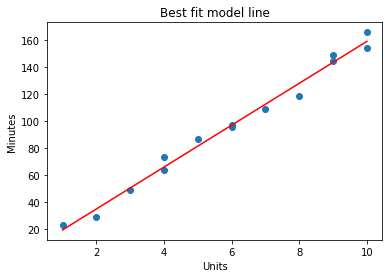

In [50]:
fig,ax = plt.subplots()
# Plotting the actual target values
ax.scatter(x="Units",y="Minutes",data=computers) 
# Plotting the target values predicted by the best fit model
ax.plot(computers.Units,computers.min_best_fit_model,color="red")
ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Best fit model line")

In [51]:
# sum of squared errors for the best fit model
# Computing the individual errors for the best fit model
best_fit_model_obs = pd.DataFrame({"Units":computers.Units,
              "Actual time":computers.Minutes,
              "Predicted time":computers.min_best_fit_model,
              "Error":computers.min_best_fit_model - computers.Minutes})
best_fit_model_obs

,Units,Actual time,Predicted time,Error
0,1,23,19.670426,-3.329574
1,2,29,35.179198,6.179198
2,3,49,50.687970,1.687970
3,4,64,66.196742,2.196742
4,4,74,66.196742,-7.803258
5,5,87,81.705514,-5.294486
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,112.723058,3.723058
9,8,119,128.231830,9.231830


In [52]:
# Sum of Squared Errors for the best fit model
print("Sum of squared errors for the best fit model: ", sum(best_fit_model_obs.Error**2))

Sum of squared errors for the best fit model:  348.848370927318


# Doing all of the above using the sklearn library

In [53]:
# Setting the 'Units' column as the input data or predictor column
X = computers[['Units']]
# Setting the 'Minutes' column as the output data or target column
y=computers['Minutes']
# Importing the required class
from sklearn.linear_model import LinearRegression
# Creating a linear regression model
model = LinearRegression()
# Fitting the model to the data i.e. building the model
model.fit(X, y)
# Fetching intercept and coefficient
print("Intercept:", model.intercept_)
print("Coefficients:",model.coef_)

Intercept: 4.161654135338296
Coefficients: [15.50877193]
